Missing values in merged dataset:
Country_Standardized         0
total_contributors           0
total_stars                  0
avg_stars_per_contributor    0
GDP                          5
GDP_per_capita               5
dtype: int64
Correlation between total contributors and GDP in 2023: 0.9030825488481744
Correlation between total stars and GDP in 2023: 0.9089448641957527
Correlation between average stars per contributor and GDP in 2023: 0.02075445611358036
Correlation between total contributors and GDP per capita in 2023: 0.20410214684183683
Correlation between total stars and GDP per capita in 2023: 0.19968809933205772
Correlation between average stars per contributor and GDP per capita in 2023: 0.27271552047253694


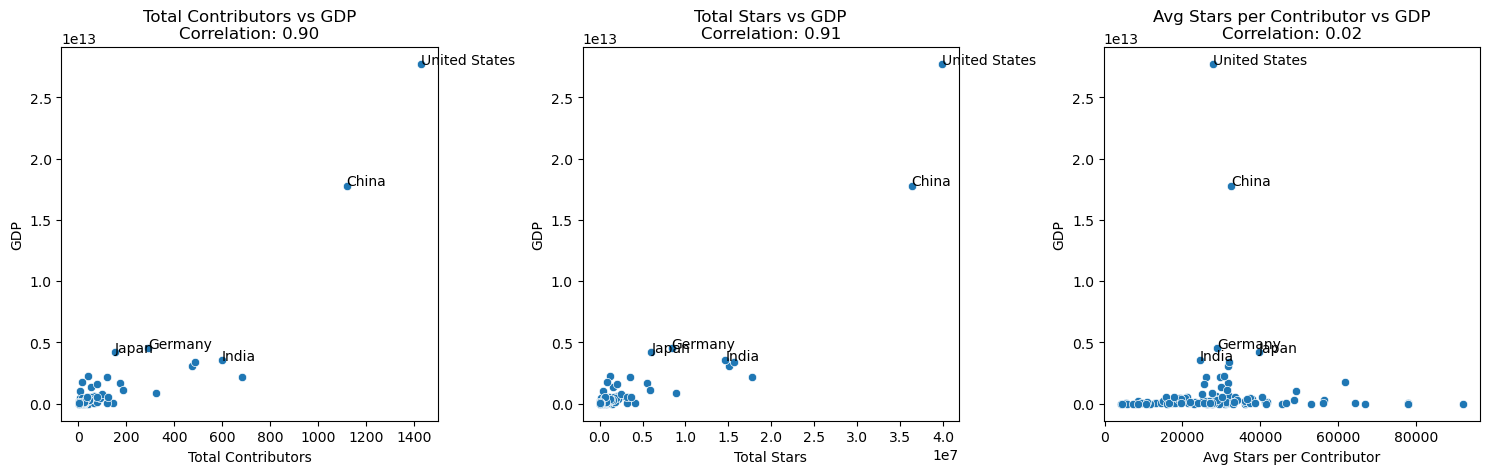

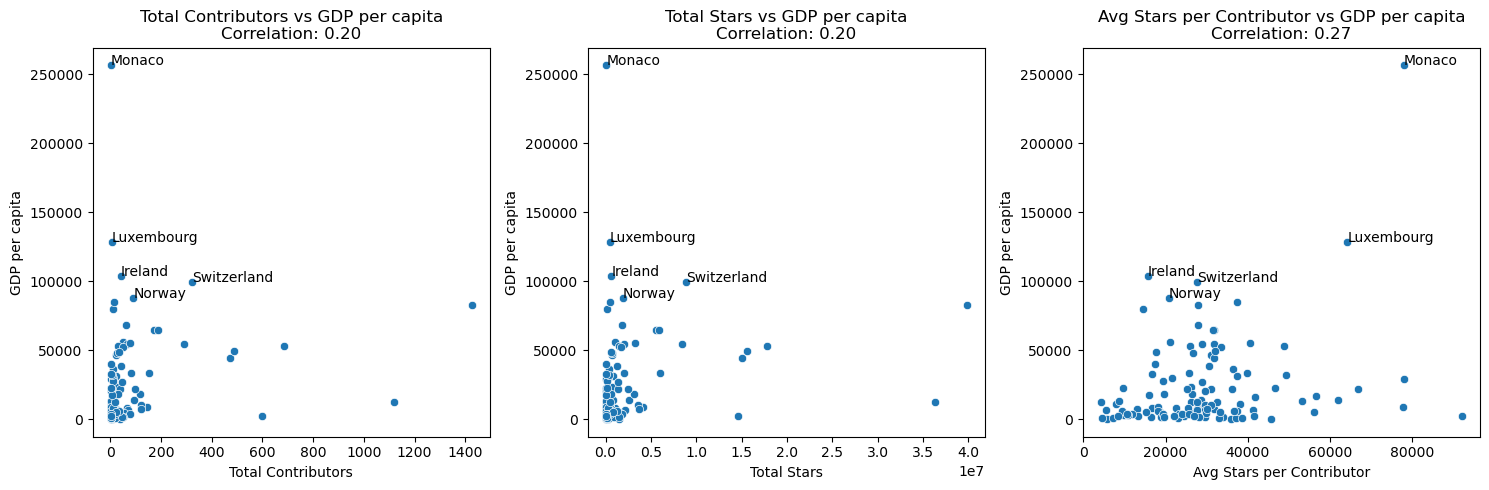

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

country_data = pd.read_csv('country_data.csv')
gdp_data = pd.read_csv('GDP.csv')
gdp_per_capita_data = pd.read_csv('GDP_per_capita.csv')

gdp_data_2023 = gdp_data[['Country Name', '2023']]
gdp_data_2023 = gdp_data_2023.rename(columns={'Country Name': 'Country_Standardized', '2023': 'GDP'})
gdp_per_capita_data_2023 = gdp_per_capita_data[['Country Name', '2023']]
gdp_per_capita_data_2023 = gdp_per_capita_data_2023.rename(columns={'Country Name': 'Country_Standardized', '2023': 'GDP_per_capita'})

final_data = pd.merge(country_data, gdp_data_2023, on='Country_Standardized', how='inner')
final_data = pd.merge(final_data, gdp_per_capita_data_2023, on='Country_Standardized', how='inner')

print("Missing values in merged dataset:")
print(final_data.isnull().sum())

final_data = final_data.dropna()

final_data['total_contributors'] = pd.to_numeric(final_data['total_contributors'], errors='coerce')
final_data['total_stars'] = pd.to_numeric(final_data['total_stars'], errors='coerce')
final_data['avg_stars_per_contributor'] = pd.to_numeric(final_data['avg_stars_per_contributor'], errors='coerce')
final_data['GDP'] = pd.to_numeric(final_data['GDP'], errors='coerce')
final_data['GDP_per_capita'] = pd.to_numeric(final_data['GDP_per_capita'], errors='coerce')

correlation_contributors_gdp = final_data['total_contributors'].corr(final_data['GDP'])
correlation_stars_gdp = final_data['total_stars'].corr(final_data['GDP'])
correlation_avg_stars_gdp = final_data['avg_stars_per_contributor'].corr(final_data['GDP'])

correlation_contributors_gdp_per_capita = final_data['total_contributors'].corr(final_data['GDP_per_capita'])
correlation_stars_gdp_per_capita = final_data['total_stars'].corr(final_data['GDP_per_capita'])
correlation_avg_stars_gdp_per_capita = final_data['avg_stars_per_contributor'].corr(final_data['GDP_per_capita'])

print(f"Correlation between total contributors and GDP in 2023: {correlation_contributors_gdp}")
print(f"Correlation between total stars and GDP in 2023: {correlation_stars_gdp}")
print(f"Correlation between average stars per contributor and GDP in 2023: {correlation_avg_stars_gdp}")

print(f"Correlation between total contributors and GDP per capita in 2023: {correlation_contributors_gdp_per_capita}")
print(f"Correlation between total stars and GDP per capita in 2023: {correlation_stars_gdp_per_capita}")
print(f"Correlation between average stars per contributor and GDP per capita in 2023: {correlation_avg_stars_gdp_per_capita}")

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.scatterplot(x='total_contributors', y='GDP', data=final_data)
plt.title(f'Total Contributors vs GDP\nCorrelation: {correlation_contributors_gdp:.2f}')
plt.xlabel('Total Contributors')
plt.ylabel('GDP')
top_5_contributors_gdp = final_data.nlargest(5, 'GDP')
for i in range(top_5_contributors_gdp.shape[0]):
    plt.text(top_5_contributors_gdp['total_contributors'].iloc[i], top_5_contributors_gdp['GDP'].iloc[i], top_5_contributors_gdp['Country_Standardized'].iloc[i])
plt.subplot(1, 3, 2)
sns.scatterplot(x='total_stars', y='GDP', data=final_data)
plt.title(f'Total Stars vs GDP\nCorrelation: {correlation_stars_gdp:.2f}')
plt.xlabel('Total Stars')
plt.ylabel('GDP')
top_5_stars_gdp = final_data.nlargest(5, 'GDP')
for i in range(top_5_stars_gdp.shape[0]):
    plt.text(top_5_stars_gdp['total_stars'].iloc[i], top_5_stars_gdp['GDP'].iloc[i], top_5_stars_gdp['Country_Standardized'].iloc[i])
plt.subplot(1, 3, 3)
sns.scatterplot(x='avg_stars_per_contributor', y='GDP', data=final_data)
plt.title(f'Avg Stars per Contributor vs GDP\nCorrelation: {correlation_avg_stars_gdp:.2f}')
plt.xlabel('Avg Stars per Contributor')
plt.ylabel('GDP')
top_5_avg_stars_gdp = final_data.nlargest(5, 'GDP')
for i in range(top_5_avg_stars_gdp.shape[0]):
    plt.text(top_5_avg_stars_gdp['avg_stars_per_contributor'].iloc[i], top_5_avg_stars_gdp['GDP'].iloc[i], top_5_avg_stars_gdp['Country_Standardized'].iloc[i])
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.scatterplot(x='total_contributors', y='GDP_per_capita', data=final_data)
plt.title(f'Total Contributors vs GDP per capita\nCorrelation: {correlation_contributors_gdp_per_capita:.2f}')
plt.xlabel('Total Contributors')
plt.ylabel('GDP per capita')
top_5_contributors_gdp_per_capita = final_data.nlargest(5, 'GDP_per_capita')
for i in range(top_5_contributors_gdp_per_capita.shape[0]):
    plt.text(top_5_contributors_gdp_per_capita['total_contributors'].iloc[i], top_5_contributors_gdp_per_capita['GDP_per_capita'].iloc[i], top_5_contributors_gdp_per_capita['Country_Standardized'].iloc[i])
plt.subplot(1, 3, 2)
sns.scatterplot(x='total_stars', y='GDP_per_capita', data=final_data)
plt.title(f'Total Stars vs GDP per capita\nCorrelation: {correlation_stars_gdp_per_capita:.2f}')
plt.xlabel('Total Stars')
plt.ylabel('GDP per capita')
top_5_stars_gdp_per_capita = final_data.nlargest(5, 'GDP_per_capita')
for i in range(top_5_stars_gdp_per_capita.shape[0]):
    plt.text(top_5_stars_gdp_per_capita['total_stars'].iloc[i], top_5_stars_gdp_per_capita['GDP_per_capita'].iloc[i], top_5_stars_gdp_per_capita['Country_Standardized'].iloc[i])
plt.subplot(1, 3, 3)
sns.scatterplot(x='avg_stars_per_contributor', y='GDP_per_capita', data=final_data)
plt.title(f'Avg Stars per Contributor vs GDP per capita\nCorrelation: {correlation_avg_stars_gdp_per_capita:.2f}')
plt.xlabel('Avg Stars per Contributor')
plt.ylabel('GDP per capita')
top_5_avg_stars_gdp_per_capita = final_data.nlargest(5, 'GDP_per_capita')
for i in range(top_5_avg_stars_gdp_per_capita.shape[0]):
    plt.text(top_5_avg_stars_gdp_per_capita['avg_stars_per_contributor'].iloc[i], top_5_avg_stars_gdp_per_capita['GDP_per_capita'].iloc[i], top_5_avg_stars_gdp_per_capita['Country_Standardized'].iloc[i])
plt.tight_layout()
plt.show()

Correlation between total contributors and number of articles in 2023: 0.5692259129410604
Correlation between total stars and number of articles in 2023: 0.572241195754739
Correlation between average stars per contributor and number of articles in 2023: 0.02286201513768722


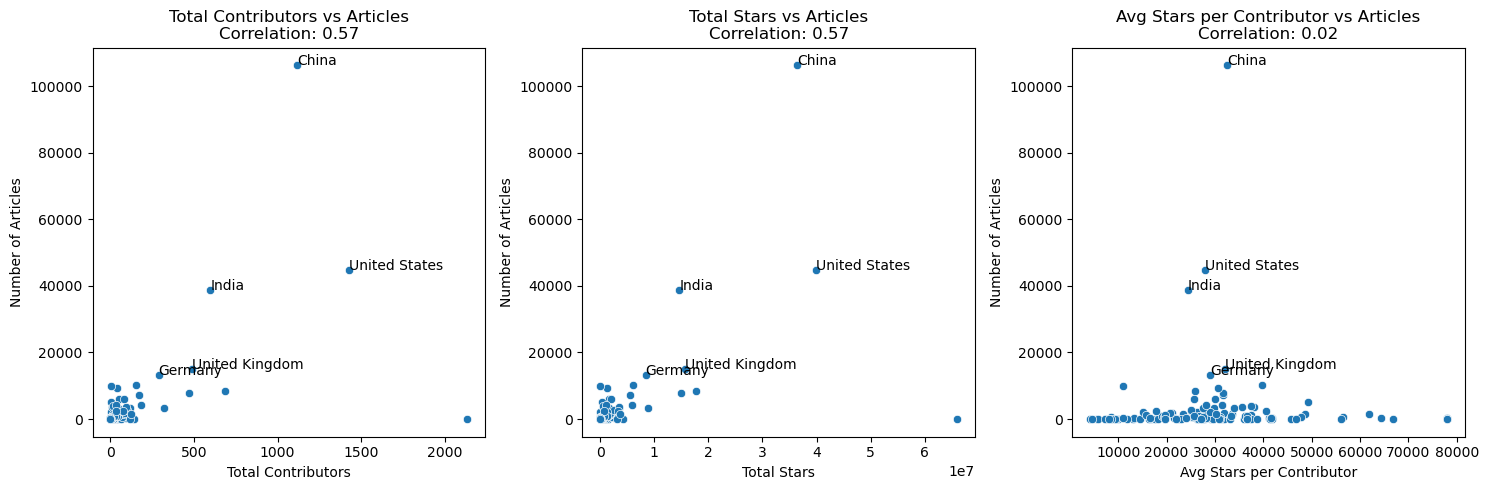

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

country_data = pd.read_csv('country_data.csv')
publication_data = pd.read_csv('publication_AI.csv')

publication_data['Entity'] = publication_data['Entity'].str.strip()
merged_data = pd.merge(country_data, publication_data, left_on='Country_Standardized', right_on='Entity', how='inner')
data_2023 = merged_data[merged_data['Year'] == 2023]

correlation_contributors = data_2023['total_contributors'].corr(data_2023['Number of articles - Field: All'])
correlation_stars = data_2023['total_stars'].corr(data_2023['Number of articles - Field: All'])
correlation_avg_stars = data_2023['avg_stars_per_contributor'].corr(data_2023['Number of articles - Field: All'])

print(f"Correlation between total contributors and number of articles in 2023: {correlation_contributors}")
print(f"Correlation between total stars and number of articles in 2023: {correlation_stars}")
print(f"Correlation between average stars per contributor and number of articles in 2023: {correlation_avg_stars}")

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.scatterplot(x='total_contributors', y='Number of articles - Field: All', data=data_2023)
plt.title(f'Total Contributors vs Articles\nCorrelation: {correlation_contributors:.2f}')
plt.xlabel('Total Contributors')
plt.ylabel('Number of Articles')
top_5_contributors = data_2023.nlargest(5, "Number of articles - Field: All")
for i in range(top_5_contributors.shape[0]):
    plt.text(top_5_contributors["total_contributors"].iloc[i], top_5_contributors["Number of articles - Field: All"].iloc[i], top_5_contributors["Country_Standardized"].iloc[i])
plt.subplot(1, 3, 2)
sns.scatterplot(x='total_stars', y='Number of articles - Field: All', data=data_2023)
plt.title(f'Total Stars vs Articles\nCorrelation: {correlation_stars:.2f}')
plt.xlabel('Total Stars')
plt.ylabel('Number of Articles')
top_5_stars = data_2023.nlargest(5, "Number of articles - Field: All")
for i in range(top_5_stars.shape[0]):
    plt.text(top_5_stars["total_stars"].iloc[i], top_5_stars["Number of articles - Field: All"].iloc[i], top_5_stars["Country_Standardized"].iloc[i])
plt.subplot(1, 3, 3)
sns.scatterplot(x='avg_stars_per_contributor', y='Number of articles - Field: All', data=data_2023)
plt.title(f'Avg Stars per Contributor vs Articles\nCorrelation: {correlation_avg_stars:.2f}')
plt.xlabel('Avg Stars per Contributor')
plt.ylabel('Number of Articles')
top_5_avg_stars = data_2023.nlargest(5, "Number of articles - Field: All")
for i in range(top_5_avg_stars.shape[0]):
    plt.text(top_5_avg_stars["avg_stars_per_contributor"].iloc[i], top_5_avg_stars["Number of articles - Field: All"].iloc[i], top_5_avg_stars["Country_Standardized"].iloc[i])
plt.tight_layout()
plt.show()

Missing values in merged dataset:
Country_Standardized         0
total_contributors           0
total_stars                  0
avg_stars_per_contributor    0
Code                         0
GERD                         0
dtype: int64
Correlation between total contributors and GERD in 2022: 0.3018749318002725
Correlation between total stars and GERD in 2022: 0.31676593229459477
Correlation between average stars per contributor and GERD in 2022: 0.060448486023847545


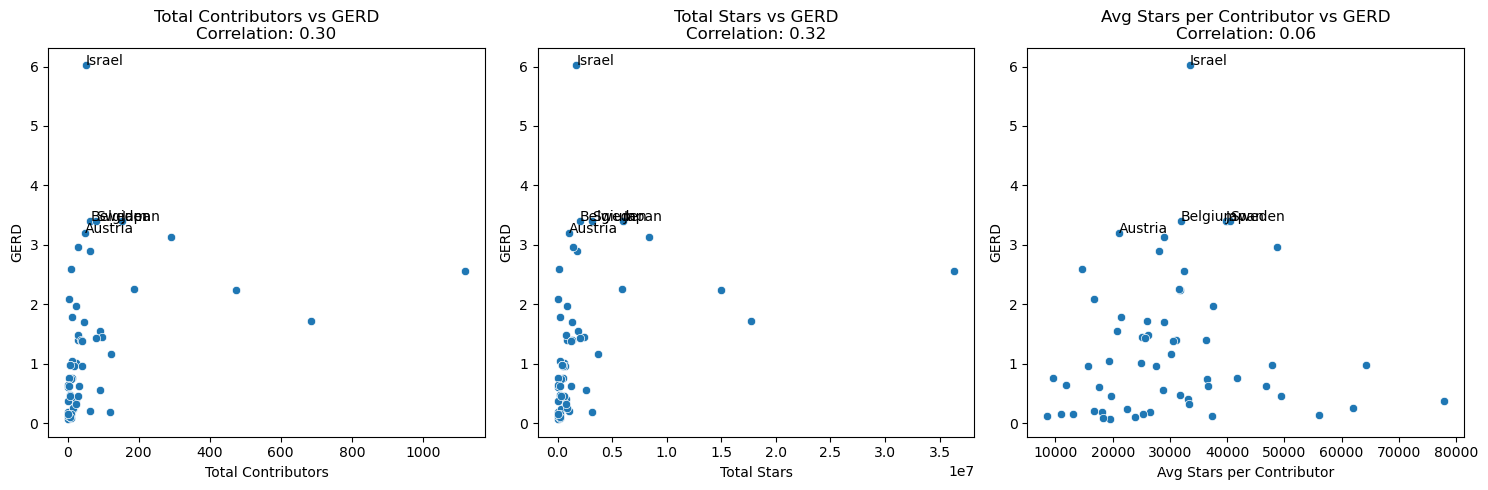

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from iso3166 import countries

country_data = pd.read_csv('country_data.csv')
gerd_data = pd.read_csv('GERD.csv')

country_name_to_code = {country.name: country.alpha3 for country in countries}
country_data['Code'] = country_data['Country_Standardized'].map(country_name_to_code)

gerd_data_2022 = gerd_data[(gerd_data['year'] == 2022) & (gerd_data['indicatorId'] == 'EXPGDP.TOT')]
gerd_data_2022 = gerd_data_2022.rename(columns={'geoUnit': 'Code', 'value': 'GERD'})

final_data = pd.merge(country_data, gerd_data_2022[['Code', 'GERD']], on='Code', how='inner')

print("Missing values in merged dataset:")
print(final_data.isnull().sum())

final_data = final_data.dropna()
final_data['total_contributors'] = pd.to_numeric(final_data['total_contributors'], errors='coerce')
final_data['total_stars'] = pd.to_numeric(final_data['total_stars'], errors='coerce')
final_data['avg_stars_per_contributor'] = pd.to_numeric(final_data['avg_stars_per_contributor'], errors='coerce')
final_data['GERD'] = pd.to_numeric(final_data['GERD'], errors='coerce')

correlation_contributors = final_data['total_contributors'].corr(final_data['GERD'])
correlation_stars = final_data['total_stars'].corr(final_data['GERD'])
correlation_avg_stars = final_data['avg_stars_per_contributor'].corr(final_data['GERD'])

print(f"Correlation between total contributors and GERD in 2022: {correlation_contributors}")
print(f"Correlation between total stars and GERD in 2022: {correlation_stars}")
print(f"Correlation between average stars per contributor and GERD in 2022: {correlation_avg_stars}")

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.scatterplot(x='total_contributors', y='GERD', data=final_data)
plt.title(f'Total Contributors vs GERD\nCorrelation: {correlation_contributors:.2f}')
plt.xlabel('Total Contributors')
plt.ylabel('GERD')
top_5_contributors = final_data.nlargest(5, "GERD")
for i in range(top_5_contributors.shape[0]):
    plt.text(top_5_contributors["total_contributors"].iloc[i], top_5_contributors["GERD"].iloc[i], top_5_contributors["Country_Standardized"].iloc[i])
plt.subplot(1, 3, 2)
sns.scatterplot(x='total_stars', y='GERD', data=final_data)
plt.title(f'Total Stars vs GERD\nCorrelation: {correlation_stars:.2f}')
plt.xlabel('Total Stars')
plt.ylabel('GERD')
top_5_stars = final_data.nlargest(5, "GERD")
for i in range(top_5_stars.shape[0]):
    plt.text(top_5_stars["total_stars"].iloc[i], top_5_stars["GERD"].iloc[i], top_5_stars["Country_Standardized"].iloc[i])
plt.subplot(1, 3, 3)
sns.scatterplot(x='avg_stars_per_contributor', y='GERD', data=final_data)
plt.title(f'Avg Stars per Contributor vs GERD\nCorrelation: {correlation_avg_stars:.2f}')
plt.xlabel('Avg Stars per Contributor')
plt.ylabel('GERD')
top_5_avg_stars = final_data.nlargest(5, "GERD")
for i in range(top_5_avg_stars.shape[0]):
    plt.text(top_5_avg_stars["avg_stars_per_contributor"].iloc[i], top_5_avg_stars["GERD"].iloc[i], top_5_avg_stars["Country_Standardized"].iloc[i])
plt.tight_layout()
plt.show()

    Country_Standardized  star_per_capita  contributor_per_capita  \
117        United States         0.119026            4.257798e-06   
23                 China         0.025772            7.925087e-07   
21                Canada         0.442976            1.705831e-05   
116       United Kingdom         0.228689            7.125091e-06   
36                France         0.219931            6.926598e-06   
..                   ...              ...                     ...   
42               Grenada         0.067065            8.541095e-06   
65                Malawi         0.000342            4.738330e-08   
64            Madagascar         0.000186            3.205546e-08   
53               Jamaica         0.001980            3.521392e-07   
67              Maldives         0.007996            1.901162e-06   

     Geographic_AIOSPI  Per_Capita_AIOSPI  
117         19932464.0           0.059515  
23          18179094.5           0.012886  
21           8881515.0           0.2214

/var/folders/91/l9yl3wm9469gxthsv6ql1fkc0000gn/T/ipykernel_11590/1139880464.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='star_per_capita', y='Country_Standardized', data=final_data_sorted, palette='viridis')
/var/folders/91/l9yl3wm9469gxthsv6ql1fkc0000gn/T/ipykernel_11590/1139880464.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='contributor_per_capita', y='Country_Standardized', data=final_data_sorted, palette='viridis')
/var/folders/91/l9yl3wm9469gxthsv6ql1fkc0000gn/T/ipykernel_11590/1139880464.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the s

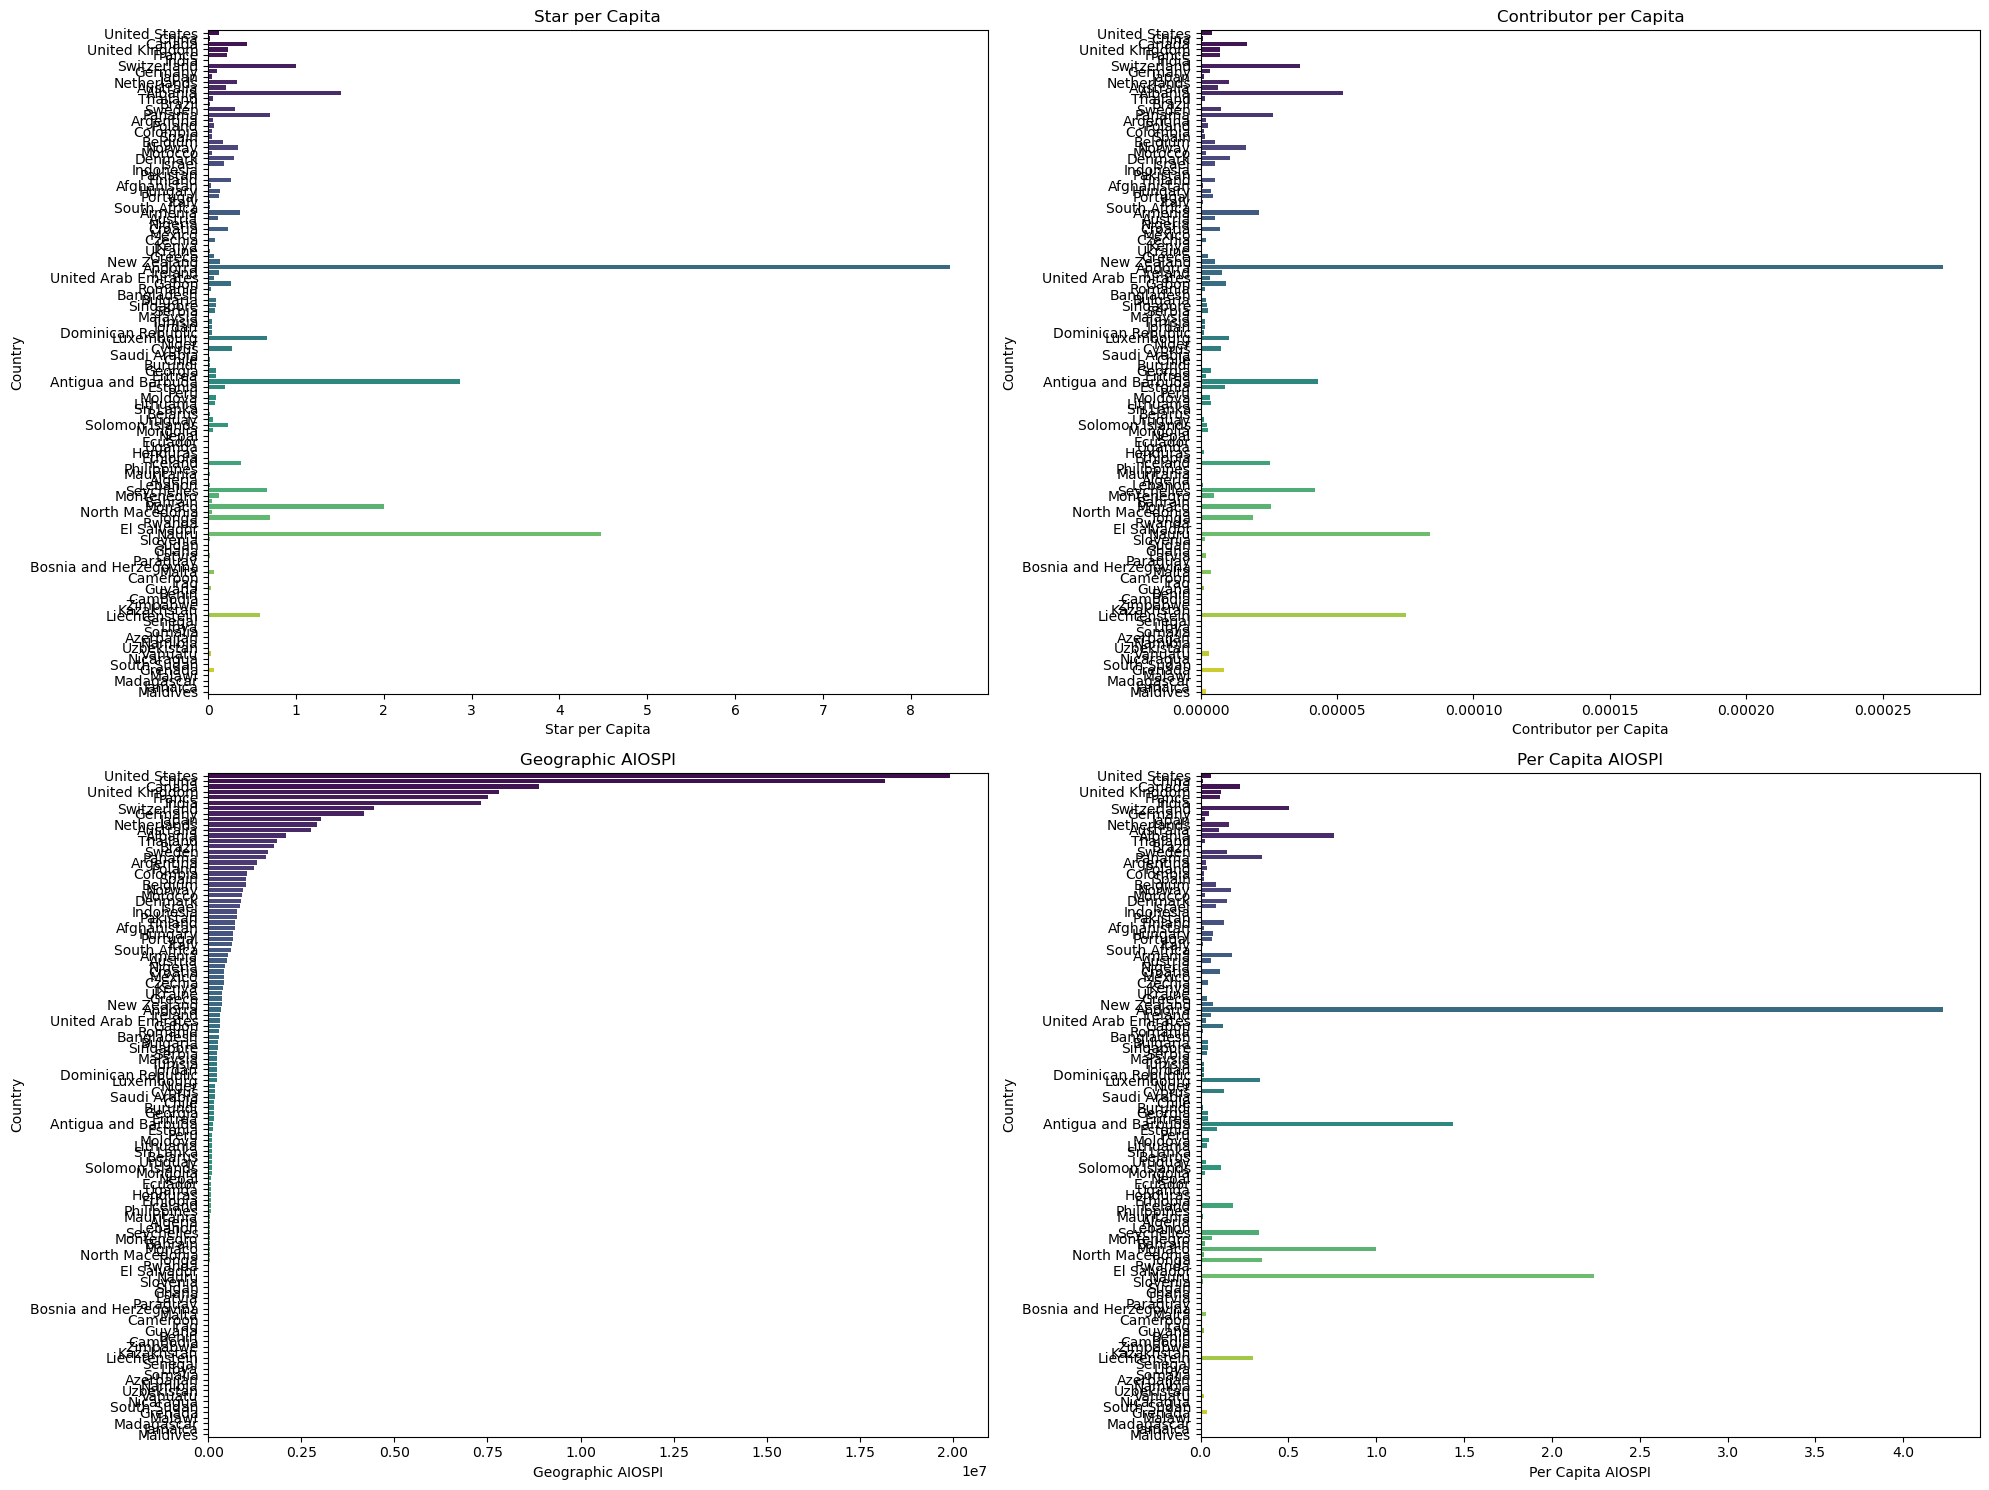

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

country_data = pd.read_csv('country_data.csv')
pop_total_data = pd.read_csv('pop_total.csv')

pop_total_data_2023 = pop_total_data[['Country Name', '2023']]
pop_total_data_2023 = pop_total_data_2023.rename(columns={'Country Name': 'Country_Standardized', '2023': 'Population'})

final_data = pd.merge(country_data, pop_total_data_2023, on='Country_Standardized', how='inner')

final_data['star_per_capita'] = final_data['total_stars'] / final_data['Population']
final_data['contributor_per_capita'] = final_data['total_contributors'] / final_data['Population']
final_data['Geographic_AIOSPI'] = 0.5 * final_data['total_contributors'] + 0.5 * final_data['total_stars']
final_data['Per_Capita_AIOSPI'] = 0.5 * (final_data['total_contributors'] / final_data['Population']) + 0.5 * (final_data['total_stars'] / final_data['Population'])

final_data_sorted = final_data.sort_values(by='Geographic_AIOSPI', ascending=False)
print(final_data_sorted[['Country_Standardized', 'star_per_capita', 'contributor_per_capita', 'Geographic_AIOSPI', 'Per_Capita_AIOSPI']])

plt.figure(figsize=(20, 15))
plt.subplot(2, 2, 1)
sns.barplot(x='star_per_capita', y='Country_Standardized', data=final_data_sorted, palette='viridis')
plt.title('Star per Capita')
plt.xlabel('Star per Capita')
plt.ylabel('Country')
plt.subplot(2, 2, 2)
sns.barplot(x='contributor_per_capita', y='Country_Standardized', data=final_data_sorted, palette='viridis')
plt.title('Contributor per Capita')
plt.xlabel('Contributor per Capita')
plt.ylabel('Country')
plt.subplot(2, 2, 3)
sns.barplot(x='Geographic_AIOSPI', y='Country_Standardized', data=final_data_sorted, palette='viridis')
plt.title('Geographic AIOSPI')
plt.xlabel('Geographic AIOSPI')
plt.ylabel('Country')
plt.subplot(2, 2, 4)
sns.barplot(x='Per_Capita_AIOSPI', y='Country_Standardized', data=final_data_sorted, palette='viridis')
plt.title('Per Capita AIOSPI')
plt.xlabel('Per Capita AIOSPI')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

     Country_Standardized  star_per_capita  contributor_per_capita  \
117         United States         0.119026            4.257798e-06   
23                  China         0.025772            7.925087e-07   
21                 Canada         0.442976            1.705831e-05   
116        United Kingdom         0.228689            7.125091e-06   
36                 France         0.219931            6.926598e-06   
47                  India         0.010184            4.165306e-07   
109           Switzerland         1.002244            3.634075e-05   
39                Germany         0.100742            3.482229e-06   
54                  Japan         0.048514            1.220720e-06   
79            Netherlands         0.328116            1.040436e-05   
7               Australia         0.207002            6.526889e-06   
1                 Albania         1.515090            5.207628e-05   
110              Thailand         0.051366            1.701476e-06   
16                 B

/var/folders/91/l9yl3wm9469gxthsv6ql1fkc0000gn/T/ipykernel_11590/4043662715.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='star_per_capita', y='Country_Standardized', data=top_50_data, palette='viridis')
/var/folders/91/l9yl3wm9469gxthsv6ql1fkc0000gn/T/ipykernel_11590/4043662715.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='contributor_per_capita', y='Country_Standardized', data=top_50_data, palette='viridis')
/var/folders/91/l9yl3wm9469gxthsv6ql1fkc0000gn/T/ipykernel_11590/4043662715.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


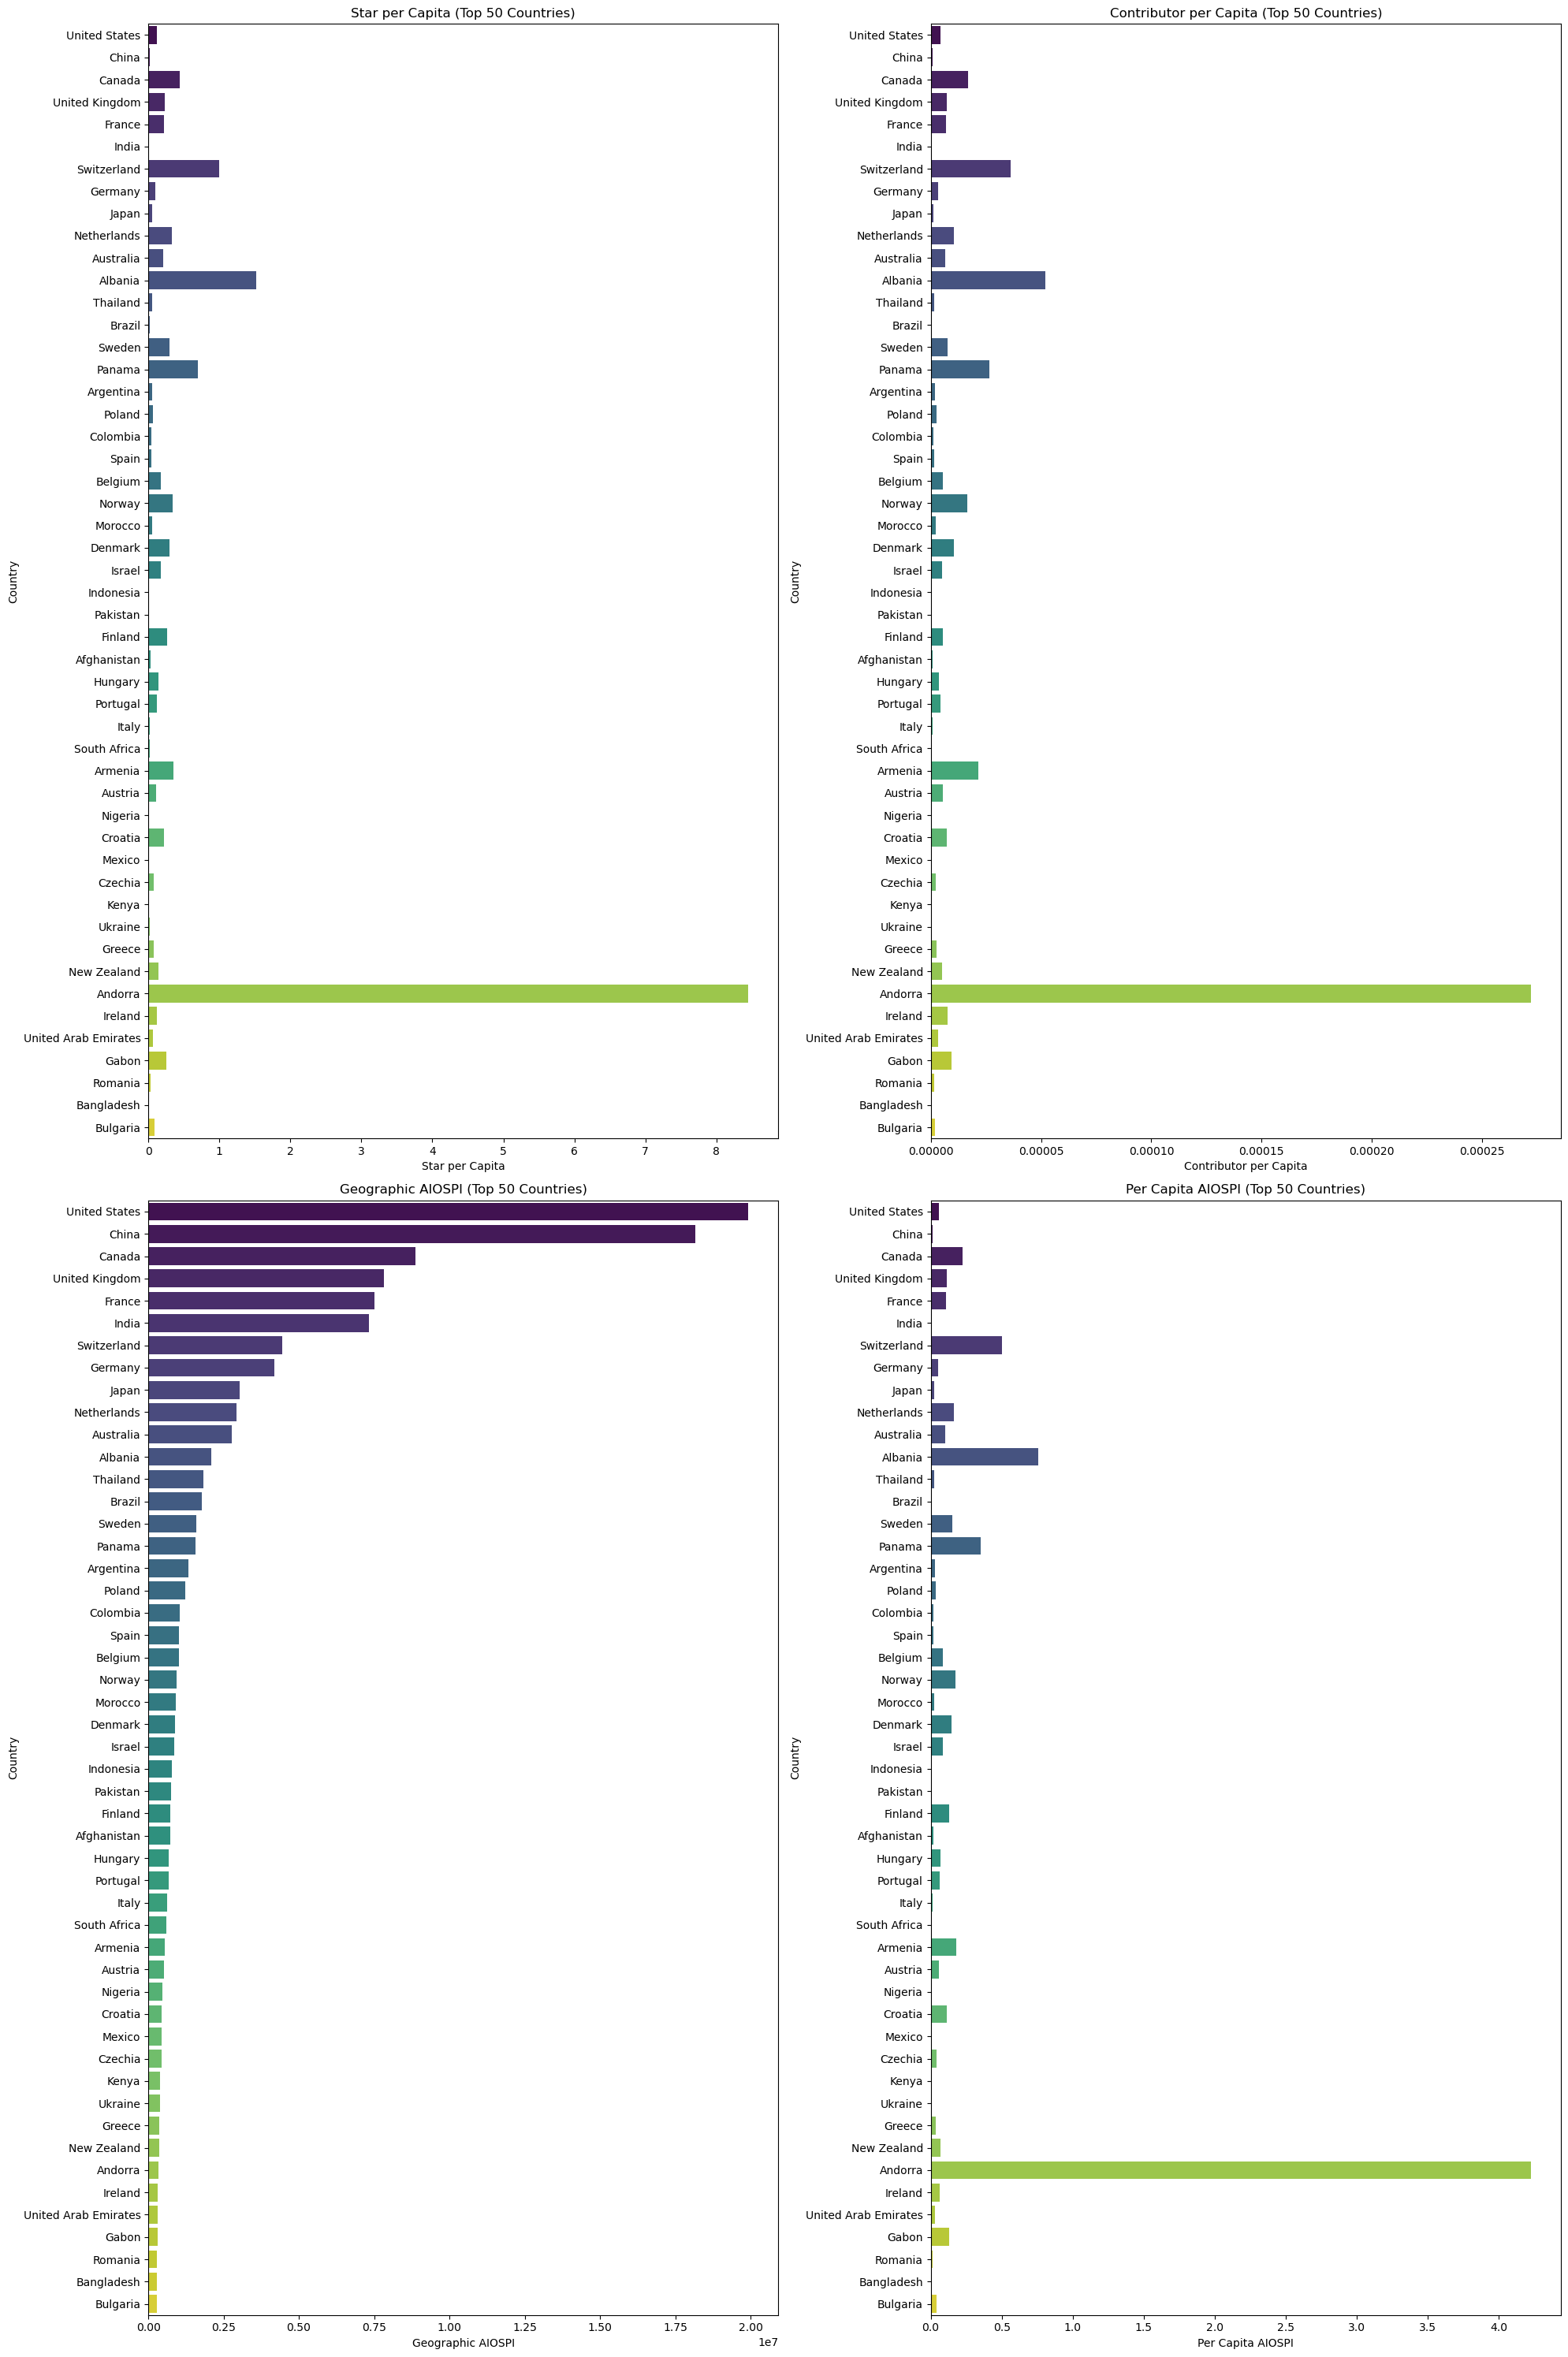

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

country_data = pd.read_csv('country_data.csv')
pop_total_data = pd.read_csv('pop_total.csv')

pop_total_data_2023 = pop_total_data[['Country Name', '2023']]
pop_total_data_2023 = pop_total_data_2023.rename(columns={'Country Name': 'Country_Standardized', '2023': 'Population'})

final_data = pd.merge(country_data, pop_total_data_2023, on='Country_Standardized', how='inner')

final_data['star_per_capita'] = final_data['total_stars'] / final_data['Population']
final_data['contributor_per_capita'] = final_data['total_contributors'] / final_data['Population']
final_data['Geographic_AIOSPI'] = 0.5 * final_data['total_contributors'] + 0.5 * final_data['total_stars']
final_data['Per_Capita_AIOSPI'] = 0.5 * (final_data['total_contributors'] / final_data['Population']) + 0.5 * (final_data['total_stars'] / final_data['Population'])

top_50_data = final_data.sort_values(by='Geographic_AIOSPI', ascending=False).head(50)
print(top_50_data[['Country_Standardized', 'star_per_capita', 'contributor_per_capita', 'Geographic_AIOSPI', 'Per_Capita_AIOSPI']])

plt.figure(figsize=(20, 30))
plt.subplot(2, 2, 1)
sns.barplot(x='star_per_capita', y='Country_Standardized', data=top_50_data, palette='viridis')
plt.title('Star per Capita (Top 50 Countries)')
plt.xlabel('Star per Capita')
plt.ylabel('Country')
plt.subplot(2, 2, 2)
sns.barplot(x='contributor_per_capita', y='Country_Standardized', data=top_50_data, palette='viridis')
plt.title('Contributor per Capita (Top 50 Countries)')
plt.xlabel('Contributor per Capita')
plt.ylabel('Country')
plt.subplot(2, 2, 3)
sns.barplot(x='Geographic_AIOSPI', y='Country_Standardized', data=top_50_data, palette='viridis')
plt.title('Geographic AIOSPI (Top 50 Countries)')
plt.xlabel('Geographic AIOSPI')
plt.ylabel('Country')
plt.subplot(2, 2, 4)
sns.barplot(x='Per_Capita_AIOSPI', y='Country_Standardized', data=top_50_data, palette='viridis')
plt.title('Per Capita AIOSPI (Top 50 Countries)')
plt.xlabel('Per Capita AIOSPI')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

    Country_Standardized  star_per_capita  contributor_per_capita  \
117        United States         0.119026            4.257798e-06   
23                 China         0.025772            7.925087e-07   
21                Canada         0.442976            1.705831e-05   
116       United Kingdom         0.228689            7.125091e-06   
36                France         0.219931            6.926598e-06   
47                 India         0.010184            4.165306e-07   
109          Switzerland         1.002244            3.634075e-05   
39               Germany         0.100742            3.482229e-06   
54                 Japan         0.048514            1.220720e-06   
79           Netherlands         0.328116            1.040436e-05   

     Geographic_AIOSPI  Per_Capita_AIOSPI  
117         19932464.0           0.059515  
23          18179094.5           0.012886  
21           8881515.0           0.221497  
116          7815699.0           0.114348  
36           7509488

/var/folders/91/l9yl3wm9469gxthsv6ql1fkc0000gn/T/ipykernel_11590/796401094.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='star_per_capita', y='Country_Standardized', data=top_10_data, palette='viridis')
/var/folders/91/l9yl3wm9469gxthsv6ql1fkc0000gn/T/ipykernel_11590/796401094.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='contributor_per_capita', y='Country_Standardized', data=top_10_data, palette='viridis')
/var/folders/91/l9yl3wm9469gxthsv6ql1fkc0000gn/T/ipykernel_11590/796401094.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  

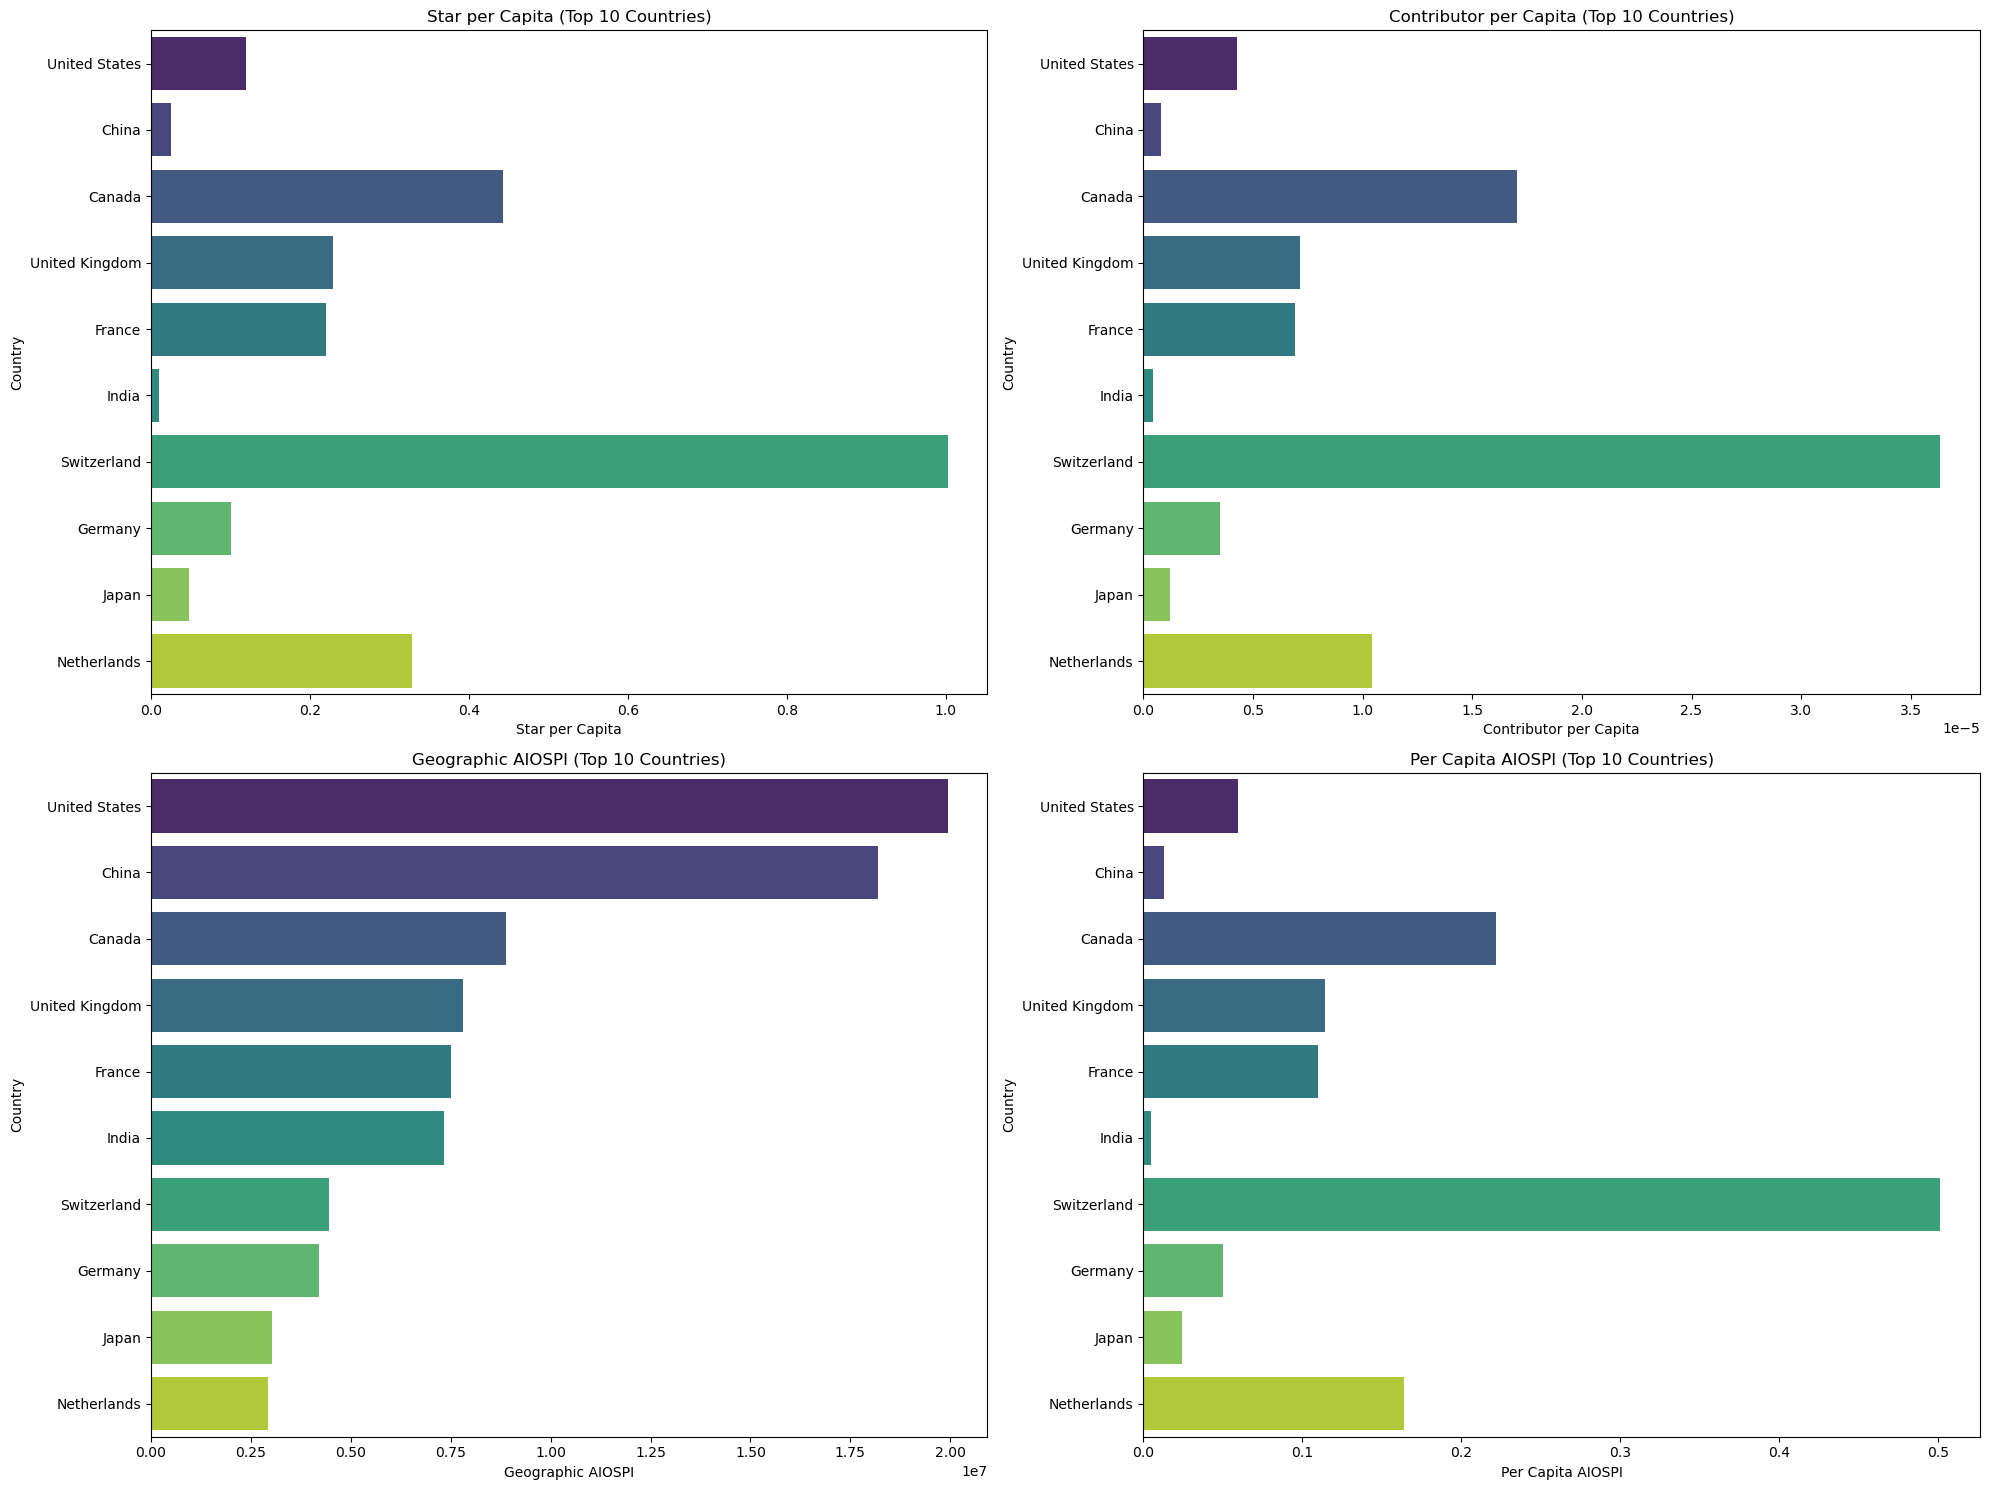

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

country_data = pd.read_csv('country_data.csv')
pop_total_data = pd.read_csv('pop_total.csv')

pop_total_data_2023 = pop_total_data[['Country Name', '2023']]
pop_total_data_2023 = pop_total_data_2023.rename(columns={'Country Name': 'Country_Standardized', '2023': 'Population'})

final_data = pd.merge(country_data, pop_total_data_2023, on='Country_Standardized', how='inner')

final_data['star_per_capita'] = final_data['total_stars'] / final_data['Population']
final_data['contributor_per_capita'] = final_data['total_contributors'] / final_data['Population']
final_data['Geographic_AIOSPI'] = 0.5 * final_data['total_contributors'] + 0.5 * final_data['total_stars']
final_data['Per_Capita_AIOSPI'] = 0.5 * (final_data['total_contributors'] / final_data['Population']) + 0.5 * (final_data['total_stars'] / final_data['Population'])

top_10_data = final_data.sort_values(by='Geographic_AIOSPI', ascending=False).head(10)
print(top_10_data[['Country_Standardized', 'star_per_capita', 'contributor_per_capita', 'Geographic_AIOSPI', 'Per_Capita_AIOSPI']])

plt.figure(figsize=(20, 15))
plt.subplot(2, 2, 1)
sns.barplot(x='star_per_capita', y='Country_Standardized', data=top_10_data, palette='viridis')
plt.title('Star per Capita (Top 10 Countries)')
plt.xlabel('Star per Capita')
plt.ylabel('Country')
plt.subplot(2, 2, 2)
sns.barplot(x='contributor_per_capita', y='Country_Standardized', data=top_10_data, palette='viridis')
plt.title('Contributor per Capita (Top 10 Countries)')
plt.xlabel('Contributor per Capita')
plt.ylabel('Country')
plt.subplot(2, 2, 3)
sns.barplot(x='Geographic_AIOSPI', y='Country_Standardized', data=top_10_data, palette='viridis')
plt.title('Geographic AIOSPI (Top 10 Countries)')
plt.xlabel('Geographic AIOSPI')
plt.ylabel('Country')
plt.subplot(2, 2, 4)
sns.barplot(x='Per_Capita_AIOSPI', y='Country_Standardized', data=top_10_data, palette='viridis')
plt.title('Per Capita AIOSPI (Top 10 Countries)')
plt.xlabel('Per Capita AIOSPI')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

Correlation between Publications and Geographic AIOSPI: 0.8517795256863826
Correlation between GDP per capita and Per Capita AIOSPI: 0.27231714833352233
                               OLS Regression Results                               
Dep. Variable:     Geographic_AIOSPI_scaled   R-squared:                       0.726
Model:                                  OLS   Adj. R-squared:                  0.723
Method:                       Least Squares   F-statistic:                     306.6
Date:                      Wed, 05 Mar 2025   Prob (F-statistic):           2.34e-34
Time:                              08:10:10   Log-Likelihood:                -91.153
No. Observations:                       118   AIC:                             186.3
Df Residuals:                           116   BIC:                             191.8
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                       

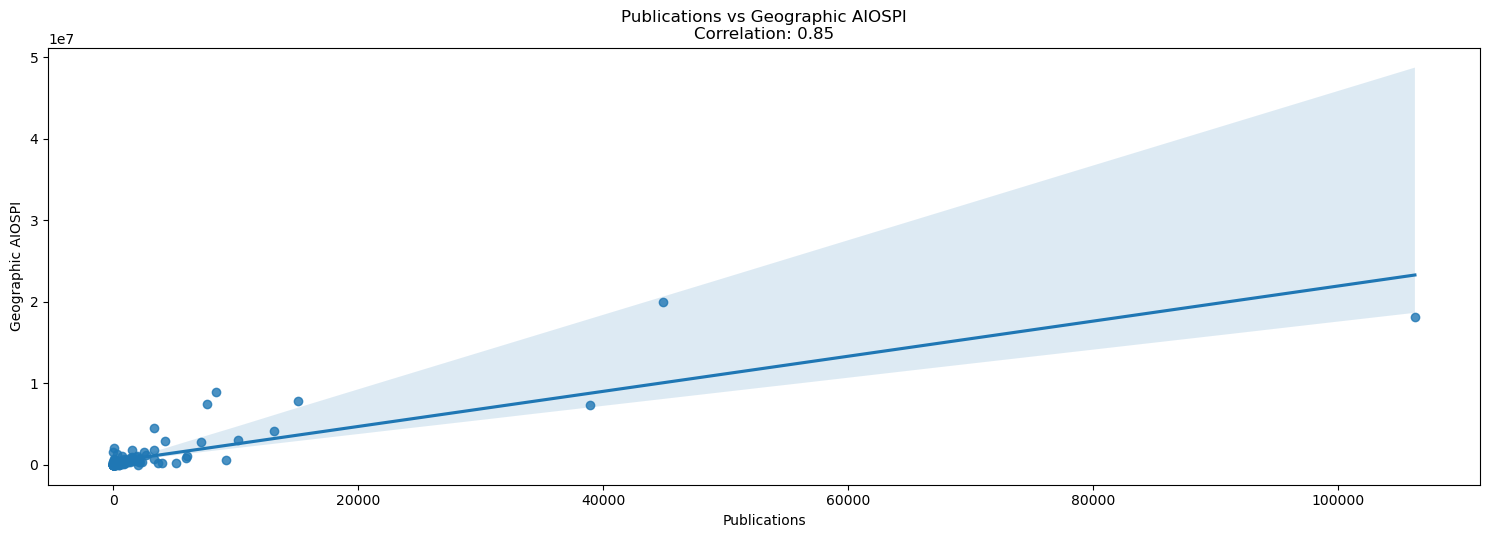

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import numpy as np

country_data = pd.read_csv('country_data.csv')
pop_total_data = pd.read_csv('pop_total.csv')
publication_data = pd.read_csv('publication_AI.csv')
gdp_per_capita_data = pd.read_csv('GDP_per_capita.csv')

pop_total_data_2023 = pop_total_data[['Country Name', '2023']]
pop_total_data_2023 = pop_total_data_2023.rename(columns={'Country Name': 'Country_Standardized', '2023': 'Population'})

final_data = pd.merge(country_data, pop_total_data_2023, on='Country_Standardized', how='inner')

final_data['star_per_capita'] = final_data['total_stars'] / final_data['Population']
final_data['contributor_per_capita'] = final_data['total_contributors'] / final_data['Population']
final_data['Geographic_AIOSPI'] = 0.5 * final_data['total_contributors'] + 0.5 * final_data['total_stars']
final_data['Per_Capita_AIOSPI'] = 0.5 * (final_data['total_contributors'] / final_data['Population']) + 0.5 * (final_data['total_stars'] / final_data['Population'])

publication_data_2023 = publication_data[publication_data['Year'] == 2023]
publication_data_2023 = publication_data_2023.rename(columns={'Entity': 'Country_Standardized', 'Number of articles - Field: All': 'Publications'})

final_data = pd.merge(final_data, publication_data_2023[['Country_Standardized', 'Publications']], on='Country_Standardized', how='inner')

gdp_per_capita_data_2023 = gdp_per_capita_data[['Country Name', '2023']]
gdp_per_capita_data_2023 = gdp_per_capita_data_2023.rename(columns={'Country Name': 'Country_Standardized', '2023': 'GDP_per_capita'})

final_data = pd.merge(final_data, gdp_per_capita_data_2023[['Country_Standardized', 'GDP_per_capita']], on='Country_Standardized', how='inner')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
# Calculate correlation
correlation_publications_geo_aiospi = final_data['Publications'].corr(final_data['Geographic_AIOSPI'])
correlation_gdp_per_capita_per_capita_aiospi = final_data['GDP_per_capita'].corr(final_data['Per_Capita_AIOSPI'])

print(f"Correlation between Publications and Geographic AIOSPI: {correlation_publications_geo_aiospi}")
print(f"Correlation between GDP per capita and Per Capita AIOSPI: {correlation_gdp_per_capita_per_capita_aiospi}")

# Linear regression: Publications vs Geographic_AIOSPI
X_publications = sm.add_constant(final_data['Publications'])
model_publications = sm.OLS(final_data['Geographic_AIOSPI'], X_publications).fit()
print(model_publications.summary())

# Linear regression: GDP per capita vs Per Capita AIOSPI
X_gdp_per_capita = sm.add_constant(final_data['GDP_per_capita'])
model_gdp_per_capita = sm.OLS(final_data['Per_Capita_AIOSPI'], X_gdp_per_capita).fit()
print(model_gdp_per_capita.summary())

# Visualize regression results
plt.figure(figsize=(15, 10))

# Publications vs Geographic_AIOSPI
plt.subplot(2, 1, 1)
sns.regplot(x='Publications', y='Geographic_AIOSPI', data=final_data)
plt.title(f'Publications vs Geographic AIOSPI\nCorrelation: {correlation_publications_geo_aiospi:.2f}')
plt.xlabel('Publications')
plt.ylabel('Geographic AIOSPI')

# GDP per capita vs Per Capita AIOSPI
plt.subplot(2, 1, 2)
sns.regplot(x='GDP_per_capita', y='Per_Capita_AIOSPI', data=final_data)
plt.title(f'GDP per capita vs Per Capita AIOSPI\nCorrelation: {correlation_gdp_per_capita_per_capita_aiospi:.2f}')
plt.xlabel('GDP per capita')
plt.ylabel('Per Capita AIOSPI')

plt.tight_layout()
plt.show()